In [1]:
import re
import numpy as np
from stl import mesh
import json

# Read the JSON file
with open('pointCloud.json', 'r') as file:
    data = json.load(file)

# Create empty lists for x, y, and z coordinates
x_coords = []
y_coords = []
z_coords = []

# Extract the x, y, and z coordinates and append them to the corresponding lists
for point in data:
    x_coords.append(point['x'])
    y_coords.append(point['y'])
    z_coords.append(point['z'])

x coordinates:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 0.93, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14.93, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [2]:

# use the numpy-stl library to create an STL file
triangle_coordinates = []
for i in range(len(x_coords)-2):
    triangle_coordinates.append([[x_coords[i], y_coords[i], z_coords[i]], [x_coords[i+1], y_coords[i+1], z_coords[i+1]], [x_coords[i+2], y_coords[i+2], z_coords[i+2]]])
data = np.array(triangle_coordinates, dtype=mesh.Mesh.dtype)
#data = np.zeros(len(x_coords), dtype=mesh.Mesh.dtype)
# data['vectors'] = np.array([x_coords, y_coords, z_coords]).T
your_mesh = mesh.Mesh(data, remove_empty_areas=False)
your_mesh.save('output.stl')

In [3]:
triangle_coordinates = np.zeros([0,3])

for i in range(len(x_coords)):
    triangle_coordinates=np.append(triangle_coordinates,[[x_coords[i], y_coords[i], z_coords[i]]],axis=0)


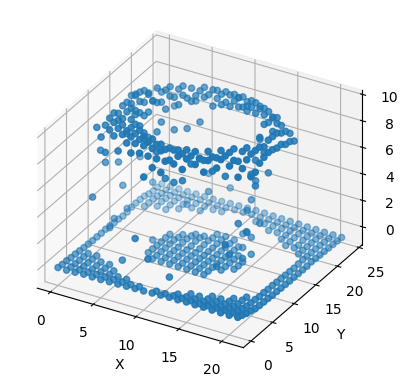

In [12]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords)



# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plot
plt.show()

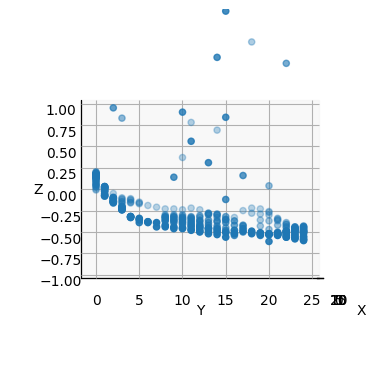

In [17]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(x_coords, y_coords, z_coords)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the focal length
ax.set_proj_type('ortho')

# Set the angle of view
ax.view_init(elev=0, azim=0)

# Set equal scaling for all axes
ax.set_aspect('equal')

# Set axis limits
ax.set_zlim([-1, 1])

# Show plot
plt.show()

In [109]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

In [5]:
max_x = max(x_coords)
max_y = max(y_coords)


no_points_on_row=max_x+1
no_rows=max_y+1
list_faces=np.zeros([0,3])
for g in range(no_rows-1):
    for f in range(no_points_on_row-1):
        cur=g*no_points_on_row+f #current vertex calculated by current row and current item on that row
        # print ("Start: "+ str(f) + " : " + str({f+no_points_on_row}) + " : " +str({f+1}))
        list_faces=np.append(list_faces,[[cur, cur+no_points_on_row, cur+1]],axis=0)
        list_faces=np.append(list_faces,[[cur+1,cur+no_points_on_row+1,cur+no_points_on_row]],axis=0)



In [6]:
# https://numpy-stl.readthedocs.io/en/latest/usage.html#creating-mesh-objects-from-a-list-of-vertices-and-faces
# https://stackoverflow.com/questions/60066405/create-a-stl-file-from-a-collection-of-points


surface = mesh.Mesh(np.zeros(list_faces.shape[0], dtype=mesh.Mesh.dtype))
for i, k in enumerate(list_faces):
    for j in range(3):
        surface.vectors[i][j] = triangle_coordinates[int(k[j]),:]

# Write the mesh to file "cube.stl"
surface.save('surface.stl')